In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
reuse=tf.AUTO_REUSE
import keras

In [28]:
coef=np.array([[1],[-10],[25]])
print(coef.shape)

(3, 1)


In [29]:
w=tf.Variable(0,dtype=tf.float32)

In [30]:
x=tf.placeholder(tf.float32,shape=(3,1))

In [31]:
cost=x[0][0]*w**2+x[1][0]*w+x[2][0]

In [32]:
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [33]:
 

ss = tf.Session()
ss.run(tf.global_variables_initializer())
for i in range(2000):
    ss.run(train,feed_dict={x:coef})

In [34]:
ss.run(w)

4.9999886

In [35]:
from keras.datasets import mnist

In [36]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


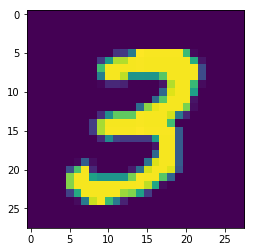

In [129]:
q=x_train[7]
plt.imshow(q)

In [41]:
def Initialize():    
    tf.set_random_seed(1)                   
    with tf.variable_scope(tf.get_variable_scope(),reuse=tf.AUTO_REUSE) as scope:
        
        W1 = tf.get_variable("W1", [300,784], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
        b1 = tf.get_variable("b1", [300,1], initializer = tf.zeros_initializer())
        W2 = tf.get_variable("W2", [100,300], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
        b2 = tf.get_variable("b2", [100,1], initializer = tf.zeros_initializer())
        W3 = tf.get_variable("W3", [10,100], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
        b3 = tf.get_variable("b3", [10,1], initializer = tf.zeros_initializer())
    

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters
        

In [42]:
def costv(Z3,Y):
    loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=tf.transpose(Z3),labels=tf.transpose(Y)))
    return(loss)

In [43]:
def placeH(n_x,n_y):
    X=tf.placeholder(tf.float32, [n_x,None])
    Y=tf.placeholder(tf.float32, [n_y,None])
    return X,Y

In [44]:

def ForwardProp(X,dictw):
    W1=dictw['W1']
    W2=dictw['W2']
    W3=dictw['W3']
    b1=dictw['b1']
    b2=dictw['b2']
    b3=dictw['b3']
        
    Z1=tf.add(tf.matmul(W1,X),b1)
    A1=tf.nn.relu(Z1)
    Z2=tf.add(tf.matmul(W2,A1),b2)
    A2=tf.nn.relu(Z2)
    Z3 = tf.add(tf.matmul(W3,A2),b3)
    return(Z3)

In [45]:
def model(X_train, Y_train,  learning_rate = 0.001,epoch = 10, minibatch_size = 30):
    
    dictw=Initialize()
    n_x,m=X_train.shape
    n_y=Y_train.shape[0]
    X,Y=placeH(n_x,n_y)
    Z3=ForwardProp(X,dictw)
    costz=costv(Z3,Y)
    #train=  tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(costz)
    train = tf.train.AdamOptimizer(1e-4).minimize(costz)
    with tf.Session() as ss:
        ss.run(tf.global_variables_initializer())
        
        for i in range(epoch):
            r=0
            u=m//minibatch_size
            for v in range(u):
                x1=X_train[:,r:r+minibatch_size]
                y1=Y_train[:,r:r+minibatch_size]
                r=r+minibatch_size
                _,costl=ss.run([train,costz],feed_dict={X:x1,Y:y1})
        print("parameters trained")
        pp=ss.run(dictw)
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
    return(pp)
            
        
    

In [46]:
X_train2=x_train.reshape(60000,784)/255

y_train2=np.eye(10)[y_train]
y_trainz=np.transpose(y_train2)
x_trainz=np.transpose(X_train2)
print(x_trainz.shape)


(784, 60000)


In [47]:
s=model(x_trainz,y_trainz)

parameters trained
Train Accuracy: 0.986733


In [48]:
X_test=x_test.reshape(10000,784)/255

y_test2=np.eye(10)[y_test]
y_testz=np.transpose(y_test2)
x_testz=np.transpose(X_test)
a,b=placeH(784,10)



In [49]:
qv=tf.Session()
Z3=ForwardProp(a,s)
#vt=q.run(Z3,feed_dict={a:x_testz,b:y_testz})

In [50]:
correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(b))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print(qv.run(accuracy,feed_dict={a:x_testz,b:y_testz}))

0.9723


In [58]:
xxx=qv.run(Z3,feed_dict={a:x_trainz,b:y_trainz})

In [59]:
xxx.shape

(10, 60000)

In [80]:
def Initialize2():    
    tf.set_random_seed(1)                   
    with tf.variable_scope(tf.get_variable_scope(),reuse=tf.AUTO_REUSE) as scope:
        
        zW1 = tf.get_variable("zW1", [100,10], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
        zb1 = tf.get_variable("zb1", [100,1], initializer = tf.zeros_initializer())
        zW2 = tf.get_variable("zW2", [300,100], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
        zb2 = tf.get_variable("zb2", [300,1], initializer = tf.zeros_initializer())
        zW3 = tf.get_variable("zW3", [784,300], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
        zb3 = tf.get_variable("zb3", [784,1], initializer = tf.zeros_initializer())
    

    parameters = {"zW1": zW1,
                  "zb1": zb1,
                  "zW2": zW2,
                  "zb2": zb2,
                  "zW3": zW3,
                  "zb3": zb3}
    
    return parameters

In [81]:
def loss2(Z3,Y):
    u=Z3-Y
    v=tf.square(u)
    f=tf.reduce_sum(v)
    f=f/60000
    return f

In [96]:
def ForwardProp2(X,dictw):
    W1=dictw['zW1']
    W2=dictw['zW2']
    W3=dictw['zW3']
    b1=dictw['zb1']
    b2=dictw['zb2']
    b3=dictw['zb3']
        
    Z1=tf.add(tf.matmul(W1,X),b1)
    A1=tf.nn.relu(Z1)
    Z2=tf.add(tf.matmul(W2,A1),b2)
    A2=tf.nn.relu(Z2)
    Z3 = tf.nn.relu(tf.add(tf.matmul(W3,A2),b3))
    return(Z3)

In [97]:
def model2(X_train, Y_train,  learning_rate = 0.001,epoch = 10, minibatch_size = 30):
    
    dictw=Initialize2()
    n_x,m=X_train.shape
    n_y=Y_train.shape[0]
    X,Y=placeH(n_x,n_y)
    Z3=ForwardProp2(X,dictw)
    costz=loss2(Z3,Y)
    #train=  tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(costz)
    train = tf.train.AdamOptimizer(1e-4).minimize(costz)
    with tf.Session() as ss:
        ss.run(tf.global_variables_initializer())
        
        for i in range(epoch):
            r=0
            u=m//minibatch_size
            for v in range(u):
                x1=X_train[:,r:r+minibatch_size]
                y1=Y_train[:,r:r+minibatch_size]
                r=r+minibatch_size
                _,costl=ss.run([train,costz],feed_dict={X:x1,Y:y1})
        print("parameters trained")
        pp=ss.run(Z3,feed_dict={X:X_train,Y:Y_train})        
    return(pp)

In [98]:
x_testz.shape

(784, 10000)

In [99]:
opp=model2(xxx,x_trainz)

parameters trained


In [100]:
opp.shape

(784, 60000)

In [146]:
ac=opp[:,0]

In [147]:
ac.reshape(28,28)

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.    

In [148]:
u=ac*255

In [149]:
u=u.reshape(28,28)

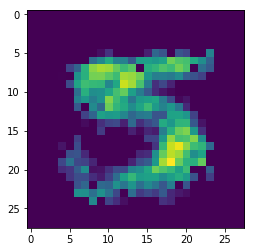

In [150]:
xz=np.abs(u)
plt.imshow(xz)
#IMAGE THAT WE RECEATED FROM THE OUTPUT

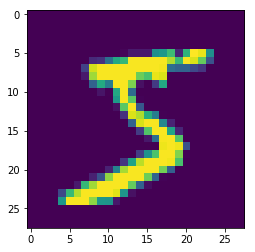

In [151]:
#ORIGINAL MNIST IMAGE
q=x_train[0]
plt.imshow(q)